# Digital Image Processing Lab

### MTH Junaidi, AP17110010074, CSE B

### Lab 04 : Histogram Equalisation

### Question

Write a program to improve contrast of an image using histogram equalization. The prototype of the function is as below:

histogram_equalisation(input_Image, no_of_bins); 
The function should return the enhanced image.

Consider two low contrast input images. Study the nature of the output image quality in each case by varying the number of bins.

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [21]:
lena = mpimg.imread("lowcontrast.png")

In [28]:
lena.shape

(200, 300)

In [34]:
image = np.array(lena)

In [35]:
image.shape

(200, 300)

In [37]:
image= image *255

In [38]:
image

array([[184., 169., 181., ..., 244., 245., 243.],
       [182., 160., 168., ..., 246., 245., 245.],
       [156., 159., 178., ..., 247., 246., 247.],
       ...,
       [118., 116., 118., ..., 109., 116., 117.],
       [121., 119., 118., ..., 108., 110., 107.],
       [119., 120., 118., ..., 113., 115., 116.]], dtype=float32)

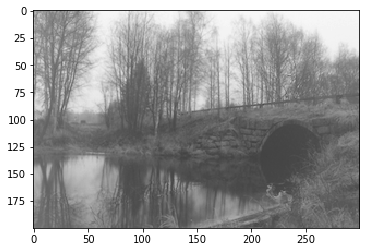

In [39]:
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

In [40]:
image.max()

248.0

In [41]:
image.min()

65.0

In [55]:
def pixel_intensities(image):
    frequency = []
    for i in range(25):
        frequency.append(0)
    for i in range (len(image)):
        for j in range(len(image[1])):
            temp = int(image[i][j]//10)
            #print(temp)
            frequency[temp] += 1
    return frequency
            

In [56]:
frequency = pixel_intensities(image)

In [57]:
frequency

[0,
 0,
 0,
 0,
 0,
 0,
 684,
 4152,
 5146,
 6407,
 6647,
 6060,
 4386,
 3660,
 3183,
 2835,
 2406,
 2218,
 1867,
 1694,
 1451,
 1547,
 1511,
 1368,
 2778]

In [58]:
sum(frequency)

60000

In [59]:
200*300

60000

In [61]:
frequency = np.array(frequency)

In [62]:
probability = frequency/60000

In [65]:
sum(probability)

1.0000000000000002

In [66]:
probability

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0114    , 0.0692    , 0.08576667, 0.10678333,
       0.11078333, 0.101     , 0.0731    , 0.061     , 0.05305   ,
       0.04725   , 0.0401    , 0.03696667, 0.03111667, 0.02823333,
       0.02418333, 0.02578333, 0.02518333, 0.0228    , 0.0463    ])

In [69]:
max(probability)

0.11078333333333333

In [76]:
len(probability)

25

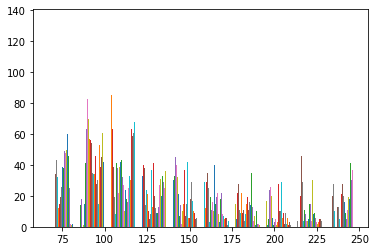

In [73]:
plt.hist(image)
plt.show()

In [75]:
cp = [0]

In [77]:
for i in range (1,25):
    cp.append(cp[i-1] + probability[i])

In [78]:
cp

[0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0114,
 0.0806,
 0.16636666666666666,
 0.27315,
 0.38393333333333335,
 0.4849333333333333,
 0.5580333333333334,
 0.6190333333333333,
 0.6720833333333334,
 0.7193333333333334,
 0.7594333333333334,
 0.7964000000000001,
 0.8275166666666668,
 0.8557500000000001,
 0.8799333333333335,
 0.9057166666666668,
 0.9309000000000002,
 0.9537000000000002,
 1.0000000000000002]

In [79]:
cp = np.array(cp)

In [96]:
Intensities = cp*500

In [97]:
temp1 =[]
temp2 = []
for i in range(len(image)):
    for j in range(len(image[1])):
        temp = Intensities[int(image[i][j]//10)]
        temp2.append(temp)
    temp1.append(temp2)
    temp2 =[]

In [98]:
better_image = np.array(temp1)

In [99]:
better_image.shape

(200, 300)

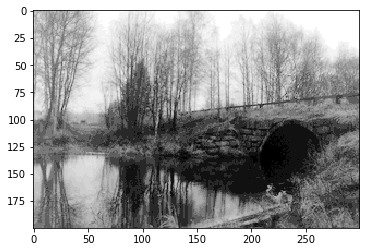

In [100]:
plt.imshow(better_image, cmap='gray')

In [107]:
new_intensities = cp*10000

In [108]:
temp1 =[]
temp2 = []
for i in range(len(image)):
    for j in range(len(image[1])):
        temp = new_intensities[int(image[i][j]//10)]
        temp2.append(temp)
    temp1.append(temp2)
    temp2 =[]

In [109]:
new_image = np.array(temp1)

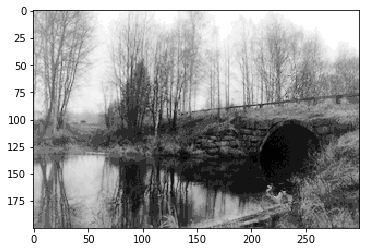

In [118]:
plt.imshow(new_image, cmap='gray', vmin=0, vmax=10000)

## Above are the results of the histogram Equialisation